In [2]:
import numpy as np

v = np.array([1, -1, 2])
w = np.array([2, 0, -3])



In [3]:
M = np.array([1, -1], [2, 3])
np.linalg.inv(M)

TypeError: Field elements must be 2- or 3-tuples, got '2'

In [5]:
# orthogonal projection
import numpy as np


def orthogonal_projection(v, basis):
    """
    Project a vector 'v' onto the subspace spanned by the columns of 'basis'.
    
    Parameters:
    v : array_like
        Vector to be projected.
    basis : array_like
        An array whose columns form a basis for the subspace.
    
    Returns:
    projection : ndarray
        Orthogonal projection of 'v' onto the subspace.
    """
    v = np.asarray(v)
    projection = np.zeros_like(v)
    for u in basis.T:  # Assuming basis vectors are columns of 'basis'
        projection += np.dot(v, u) / np.dot(u, u) * u
    return projection


# Example usage:
v = np.array([3, 2], dtype=float)
basis = np.array([[1, 0], [0, 1]], dtype=float)  # Standard basis for R^2
projection = orthogonal_projection(v, basis)
print("Orthogonal projection of v onto W:", projection)


Orthogonal projection of v onto W: [3. 2.]


In [1]:
import numpy as np

# Define a square matrix
A = np.array([[4, 2],
              [1, 3]])

# Calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)

print("Eigenvalues:", eigenvalues)
print("Eigenvectors:", eigenvectors)


Eigenvalues: [5. 2.]
Eigenvectors: [[ 0.89442719 -0.70710678]
 [ 0.4472136   0.70710678]]


In [2]:
D = np.diag(eigenvalues)

# Compute P inverse
P = eigenvectors
P_inv = np.linalg.inv(P)
# Reconstruct original matrix
A_reconstructed = P @ D @ P_inv

print("Original matrix A:\n", A)
print("Reconstructed matrix A using PDP^-1:\n", A_reconstructed)

Original matrix A:
 [[4 2]
 [1 3]]
Reconstructed matrix A using PDP^-1:
 [[4. 2.]
 [1. 3.]]


In [3]:
import numpy as np

# Define a matrix A
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9],
              [10, 11, 12]])

# Perform Singular Value Decomposition
U, S, VT = np.linalg.svd(A)

print("Left singular vectors (U):")
print(U)
print("\nSingular values (S):")
print(S)
print("\nRight singular vectors (V^T):")
print(VT)

# Reconstruct the original matrix using U, S, and VT
Sigma = np.zeros((A.shape[0], A.shape[1]))
# Populate Sigma with n x n diagonal matrix
Sigma[:A.shape[1], :A.shape[1]] = np.diag(S)
A_reconstructed = U @ Sigma @ VT

print("\nReconstructed matrix (A):")
print(A_reconstructed)


Left singular vectors (U):
[[-0.14087668 -0.82471435  0.54704904 -0.02715407]
 [-0.34394629 -0.42626394 -0.70915928  0.4439517 ]
 [-0.54701591 -0.02781353 -0.22282857 -0.80644121]
 [-0.75008553  0.37063688  0.38493881  0.38964357]]

Singular values (S):
[2.54624074e+01 1.29066168e+00 1.80972823e-15]

Right singular vectors (V^T):
[[-0.50453315 -0.5745157  -0.64449826]
 [ 0.76077568  0.05714052 -0.64649464]
 [-0.40824829  0.81649658 -0.40824829]]

Reconstructed matrix (A):
[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]


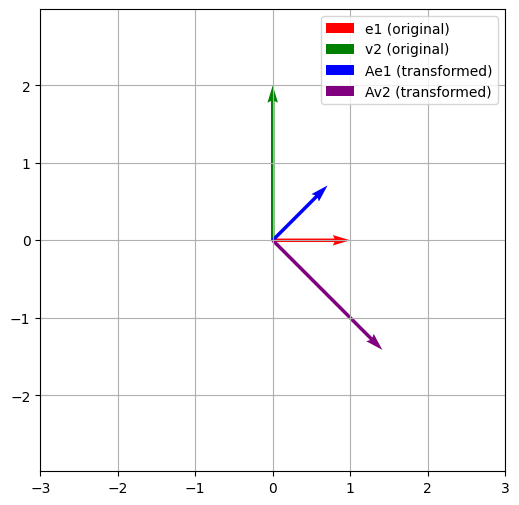

In [13]:
# Linear Algebra: Orthogonal Transformations and Matrices (Full Lecture)
# https://www.youtube.com/watch?v=vL4Qp4EoJS8

import numpy as np
import matplotlib.pyplot as plt

# Define vectors
e1 = np.array([1, 0])
v2 = np.array([0, 2])

# Define matrix A
A = np.array([[np.sqrt(2) / 2, np.sqrt(2) / 2],
              [np.sqrt(2) / 2, -np.sqrt(2) / 2]])

# Apply matrix A to vectors e1 and v2
Ae1 = A @ e1
Av2 = A @ v2

# Plot the original and transformed vectors
plt.figure(figsize=(6, 6))
plt.quiver(0, 0, e1[0], e1[1], angles='xy', scale_units='xy', scale=1, color='red', label='e1 (original)')
plt.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='green', label='v2 (original)')
plt.quiver(0, 0, Ae1[0], Ae1[1], angles='xy', scale_units='xy', scale=1, color='blue', label='Ae1 (transformed)')
plt.quiver(0, 0, Av2[0], Av2[1], angles='xy', scale_units='xy', scale=1, color='purple', label='Av2 (transformed)')

# Setting the aspect ratio of the plot to be equal, to maintain the scale of vectors
plt.axis('equal')

# Set the limits of the plot
plt.xlim(-3, 3)
plt.ylim(-3, 3)

# Add a grid
plt.grid(True)

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [29]:
import numpy as np

# Define a matrix A, m*n matrix, where m = n
A = np.array([[0, 1, 1],
              [2 ** .5, 2, 0],
              [0, 1, 1]])

# B is m*n matrix, where m > n
B = np.array([[1, 2],
              [3, 4],
              [5, 6]])

# C is m*n which m < n
C = np.array([[1, 2, 3],
              [4, 5, 6]])


def svd1(A: np.ndarray):
    # custom svd
    # A = U @ S @ V^T
    # A: m*n matrix
    # U: m*m Orthogonal matrix
    # S: m*n diagonal matrix    
    # V: n*n Orthogonal matrix

    m, n = A.shape[-2:]
    AA_T = A @ A.T
    A_TA = A.T @ A
    eigenvalues, eigenvectors = np.linalg.eig(AA_T)
    print("eigenvalues:\n", eigenvalues)
    print("eigenvectors:\n", eigenvectors)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    print("sorted_indices:\n", sorted_indices)
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    print("sorted eigenvalues:\n", eigenvalues)
    print("sorted eigenvectors:\n", eigenvectors)

    # calculate the norm  
    # for each column of the eigenvector matrix
    norms = np.linalg.norm(eigenvectors, axis=0)
    print("norms:\n", norms)

   # flip the sign of the second column of the eigenvector matrix
    
    eigenvalues2, eigenvectors2 = np.linalg.eig(A_TA)
    print("eigenvalues2:\n", eigenvalues2)
    print("eigenvectors2:\n", eigenvectors2)
    sorted_indices2 = np.argsort(eigenvalues2)[::-1]
    eigenvectors2 = eigenvectors2[:, sorted_indices2]
    eigenvalues2 = eigenvalues2[sorted_indices2]
    print("sorted eigenvalues2:\n", eigenvalues2)
    print("sorted eigenvectors2:\n", eigenvectors2)

    # calculate the norm
    # for each column of the eigenvector matrix
    norms2 = np.linalg.norm(eigenvectors2, axis=0)
    print("norms2:\n", norms2)

    sigma_matrix = np.zeros((A.shape[0], A.shape[1]))
    if m >= n:
        singular_values = np.sqrt([ev if ev > 0 else 0 for ev in eigenvalues2])
    else:
        singular_values = np.sqrt([ev if ev > 0 else 0 for ev in eigenvalues])
    print("singular_values:\n", singular_values)
    min_dimension = min(A.shape[0], A.shape[1])
    np.fill_diagonal(sigma_matrix, singular_values[:min_dimension])
    print("sigma_matrix:\n", sigma_matrix)
    U = eigenvectors
    V = eigenvectors2
    A_reconstructed = U @ sigma_matrix @ V.T
    print("A_reconstructed:\n", A_reconstructed)
    assert np.allclose(A, A_reconstructed, atol=1e-5)
    return U, sigma_matrix, V


# Test with matrix B
# U, sigma, Vt = svd2(B)

# U, S, VT = svd1(A)
# print("Left singular vectors (U):")
# print(U)
# print("\nSingular values (S):")
# print(S)
# print("\nRight singular vectors (V^T):")
# print(VT)


U2, S2, VT2 = np.linalg.svd(C)

print("Left singular vectors (U):")
print(U2)
print("\nSingular values (S):")
print(S2)
print("\nRight singular vectors (V^T):")
print(VT2)

U1, S1, VT1 = svd1(C)





Left singular vectors (U):
[[-0.3863 -0.9224]
 [-0.9224  0.3863]]

Singular values (S):
[9.508  0.7729]

Right singular vectors (V^T):
[[-0.4287 -0.5663 -0.7039]
 [ 0.806   0.1124 -0.5812]
 [ 0.4082 -0.8165  0.4082]]
eigenvalues:
 [ 0.5973 90.4027]
eigenvectors:
 [[-0.9224 -0.3863]
 [ 0.3863 -0.9224]]
sorted_indices:
 [1 0]
sorted eigenvalues:
 [90.4027  0.5973]
sorted eigenvectors:
 [[-0.3863 -0.9224]
 [-0.9224  0.3863]]
norms:
 [1. 1.]
eigenvalues2:
 [90.4027  0.5973 -0.    ]
eigenvectors2:
 [[-0.4287 -0.806   0.4082]
 [-0.5663 -0.1124 -0.8165]
 [-0.7039  0.5812  0.4082]]
sorted eigenvalues2:
 [90.4027  0.5973 -0.    ]
sorted eigenvectors2:
 [[-0.4287 -0.806   0.4082]
 [-0.5663 -0.1124 -0.8165]
 [-0.7039  0.5812  0.4082]]
norms2:
 [1. 1. 1.]
singular_values:
 [9.508  0.7729]
sigma_matrix:
 [[9.508  0.     0.    ]
 [0.     0.7729 0.    ]]
A_reconstructed:
 [[1. 2. 3.]
 [4. 5. 6.]]


In [55]:
import numpy as np

eigenvalues = np.array([0.59732747, 90.40267253])
eigenvectors = np.array([[-0.92236578, -0.3863177],
                         [0.3863177, -0.92236578]])

# Sort eigenvalues in descending order and get sorted indices
sorted_indices = np.argsort(eigenvalues)[::-1]

# Rearrange the columns of the eigenvector matrix to match sorted eigenvalues
sorted_eigenvectors = eigenvectors[:, sorted_indices]

print("Sorted Eigenvalues:", eigenvalues[sorted_indices])
print("Sorted Eigenvectors:\n", sorted_eigenvectors)


Sorted Eigenvalues: [90.40267253  0.59732747]
Sorted Eigenvectors:
 [[-0.3863177  -0.92236578]
 [-0.92236578  0.3863177 ]]


In [8]:
import numpy as np

# Define a matrix A
A = np.array([[4, 11, 14],
              [8, 7, -2]])

AAT = A @ A.T
print("AAT:\n", AAT)

eigenvalues, eigenvectors = np.linalg.eig(AAT)
print("Eigenvectors:\n", eigenvectors)
print("\nEigenvalues:\n", eigenvalues)

U, S, VT = np.linalg.svd(A)

print("Left singular vectors (U):")
print(U)
print("\nSingular values (S):")
print(S)
print("\nRight singular vectors (V^T):")
print(VT)


AAT:
 [[333  81]
 [ 81 117]]
Eigenvectors:
 [[ 0.9486833  -0.31622777]
 [ 0.31622777  0.9486833 ]]

Eigenvalues:
 [360.  90.]
Left singular vectors (U):
[[-0.9486833  -0.31622777]
 [-0.31622777  0.9486833 ]]

Singular values (S):
[18.97366596  9.48683298]

Right singular vectors (V^T):
[[-0.33333333 -0.66666667 -0.66666667]
 [ 0.66666667  0.33333333 -0.66666667]
 [-0.66666667  0.66666667 -0.33333333]]


In [2]:
import numpy as np

# Define a simple 2x2 orthogonal matrix Q
Q = np.array([
    [1 / np.sqrt(2), -1 / np.sqrt(2)],
    [1 / np.sqrt(2), 1 / np.sqrt(2)]
])

# Calculate the outer product of the first column vector with itself
u1 = Q[:, 0]  # First column of Q
outer_product_u1 = np.outer(u1, u1)

# Calculate the outer product of the second column vector with itself
u2 = Q[:, 1]  # Second column of Q
outer_product_u2 = np.outer(u2, u2)

# The sum of these outer products should give us Q * Q.T
sum_of_outer_products = outer_product_u1 + outer_product_u2

# Verify that sum_of_outer_products is equal to Q * Q.T
QQT = Q @ Q.T

print(QQT)

np.allclose(sum_of_outer_products, QQT)




[[ 1.00000000e+00 -2.23711432e-17]
 [-2.23711432e-17  1.00000000e+00]]


True

In [16]:
# Given a diagonal matrix with diagonal elements, we will create its inverse
# First, create the given matrix using numpy
D = np.array([
    [18.97366596, 0., 0.],
    [0., 9.48683298, 0.]
])

# Now, to compute the inverse of a diagonal matrix, we can simply take the reciprocal of the non-zero elements
D_inv = np.diag(1 / np.diag(D))

D_inv


array([[0.05270463, 0.        ],
       [0.        , 0.10540926]])

In [19]:
import numpy as np

A = np.array([[4, 11, 14],
              [8, 7, -2]])

# svd
U, S, VT = np.linalg.svd(A)

sigma_matrix = np.zeros((A.shape[0], A.shape[1]))
np.fill_diagonal(sigma_matrix, S)
A_inv = np.diag(1 / sigma_matrix)

# Extending the 2x2 diagonal inverse matrix to a 2x3 matrix by adding a column of zeros
A_inv_extended = np.hstack([D_inv, np.zeros((2, 1))])
print("sigma_matrix:\n", sigma_matrix)
print("VT.T.shape", VT.T.shape)
print("np.linalg.inv(sigma_matrix).shape", A_inv_extended.shape)
print("U.T.shape", S.shape)

# A+ = V @ D+ @ U^T
A_pseudoinverse1 = VT.T @ A_inv_extended.T @ U.T
A_pseudoinverse2 = np.linalg.pinv(A)

np.allclose(A_pseudoinverse1, A_pseudoinverse2)


sigma_matrix:
 [[18.97366596  0.          0.        ]
 [ 0.          9.48683298  0.        ]]
VT.T.shape (3, 3)
np.linalg.inv(sigma_matrix).shape (2, 3)
U.T.shape (2,)


/var/folders/93/1rzwtwg956b99qtkd3h2j3_40000gn/T/ipykernel_60025/814260762.py:12: RuntimeWarning: divide by zero encountered in divide
  A_inv = np.diag(1 / sigma_matrix)


True

img_mat [[143. 144. 145. ... 151. 138. 110.]
 [143. 144. 145. ... 151. 138. 110.]
 [143. 144. 144. ... 150. 138. 109.]
 ...
 [ 38.  39.  43. ...  87.  83.  80.]
 [ 37.  41.  45. ...  83.  85.  86.]
 [ 38.  42.  48. ...  82.  86.  89.]]


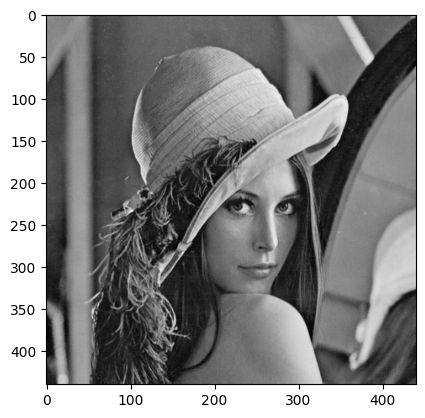

In [31]:
import numpy as np
import pandas as pd
import cv2 as cv
from skimage import io
from PIL import Image
import matplotlib.pyplot as plt

url = "https://upload.wikimedia.org/wikipedia/en/thumb/7/7d/Lenna_%28test_image%29.png/440px-Lenna_%28test_image%29.png"
img = io.imread(url)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_mat = np.array(list(gray), dtype=np.float32)
print("img_mat", img_mat)
plt.imshow(img_mat, cmap='gray')





In [32]:
# scale the image before applying SVD
img_mat_scaled = (img_mat - np.mean(img_mat)) / np.std(img_mat)
U, S, VT = np.linalg.svd(img_mat_scaled)
# compute variance explained by each singular value
explained_variance = np.round(S ** 2 / np.sum(S ** 2), decimals=3)


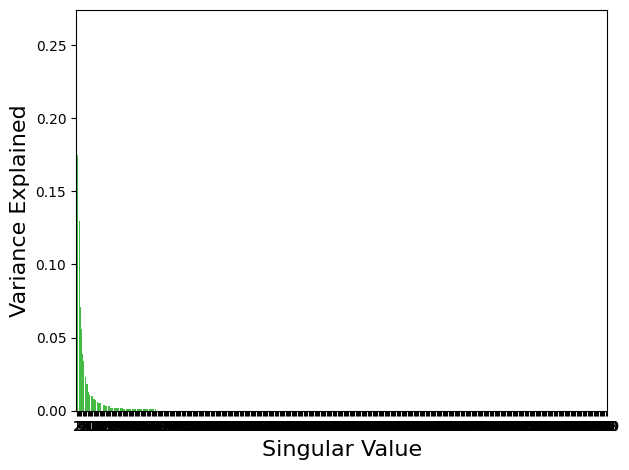

In [36]:
import seaborn as sns
sns.barplot(x=list(range(1, len(explained_variance) + 1)),
            y=explained_variance, color="limegreen")

plt.xlabel('Singular Value', fontsize=16)
plt.ylabel('Variance Explained', fontsize=16)
plt.tight_layout()
plt.savefig('variance_explained.png', dpi=150)


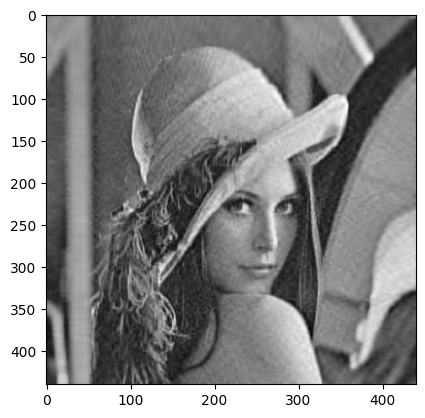

In [35]:
# Reconstruct the image using the first 5 singular values
num_singular_values = 50
reconstructed_img_mat = U[:, :num_singular_values] @ np.diag(S[:num_singular_values]) @ VT[:num_singular_values, :]
plt.imshow(reconstructed_img_mat, cmap='gray')

In [37]:
# Since the code execution state was reset, let's redefine the data and compute the covariance matrix again

import numpy as np

# Define the data array again
data = np.array([
    [1, 2, 3],
    [5, 6, 7],
    [9, 10, 11],
    [13, 14, 15],
    [17, 18, 19]
])

# Compute the covariance matrix using numpy's cov function
cov_matrix = np.cov(data.T)  # Transpose to consider columns as features

cov_matrix


array([[40., 40., 40.],
       [40., 40., 40.],
       [40., 40., 40.]])

In [39]:
import sympy as sym

x = sym.symbols('x')
derivative = sym.diff(x ** 2 + 2 * x + 1, x)
print(derivative)
derivative1 = sym.diff(sym.sin(x), x)
print(derivative1)

2*x + 2
cos(x)


In [40]:
import sympy as sym
# second derivative
x = sym.symbols('x')
derivative = sym.diff(x ** 2 + 2 * x + 1, x, 2)
print(derivative)

2


In [41]:
import sympy as sym
# partial derivative
x, y = sym.symbols('x y')
derivative = sym.diff(x ** 2 + 2 * x * y + y ** 2, x)
print(derivative)

2*x + 2*y


In [42]:
import sympy as sym
# second partial derivative
x, y = sym.symbols('x y')
derivative = sym.diff(x ** 2 + 2 * x * y + y ** 2, x, 2)
print(derivative)

2


In [43]:
import sympy as sym
# integral
x = sym.symbols('x')
integral = sym.integrate(x ** 2 + 2 * x + 1, x) 
print(integral)

x**3/3 + x**2 + x


In [7]:
import numpy as np

A = np.arange(20000)
A = A.reshape(10000, 2)
print(A.strides)
A_T = A.T
print(A_T.strides)


(16, 8)
(8, 16)
